# Ground state
This notebook is to study the effect of learning less patterns than the maximun capacity of the network. In this case it appears that a ground state appears as a spurious state. We study how the dynamics depend on the reset of the activation status.

In [1]:
from __future__ import print_function
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from network import BCPNN
from data_transformer import build_ortogonal_patterns
from analysis_functions import calculate_angle_from_history
from analysis_functions import calculate_winning_pattern_from_distances, calculate_patterns_timings

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

np.set_printoptions(suppress=True, precision=2)

#### Git training

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '127d8b9e08a368243e1775da92c304e74fc551e7'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

## Build the patterns and train the network
Firs we store n_patterns in a network of size hypercolumns * minicolumns

In [3]:
hypercolumns = 8
minicolumns = 8
n_patterns = 4  # Number of patterns

patterns_dic = build_ortogonal_patterns(hypercolumns, minicolumns)
patterns = list(patterns_dic.values())
patterns = patterns[:n_patterns]

# Build the network
nn = BCPNN(hypercolumns, minicolumns)
nn.k = 1.0
nn.randomize_pattern()

nn.get_parameters()

{'g_I': 10.0,
 'g_a': 97.0,
 'g_beta': 1,
 'g_w': 1,
 'k': 1.0,
 'sigma': 1.0,
 'tau_a': 2.7,
 'tau_m': 0.05,
 'tau_p': 10.0,
 'tau_z_post': 0.24,
 'tau_z_pre': 0.24}

In [4]:
dt = 0.001
T_training = 1.0
training_time = np.arange(0, T_training + dt, dt)

for pattern in patterns:
    print('trained')
    nn.run_network_simulation(training_time, I=pattern, save=True)

trained
trained
trained
trained


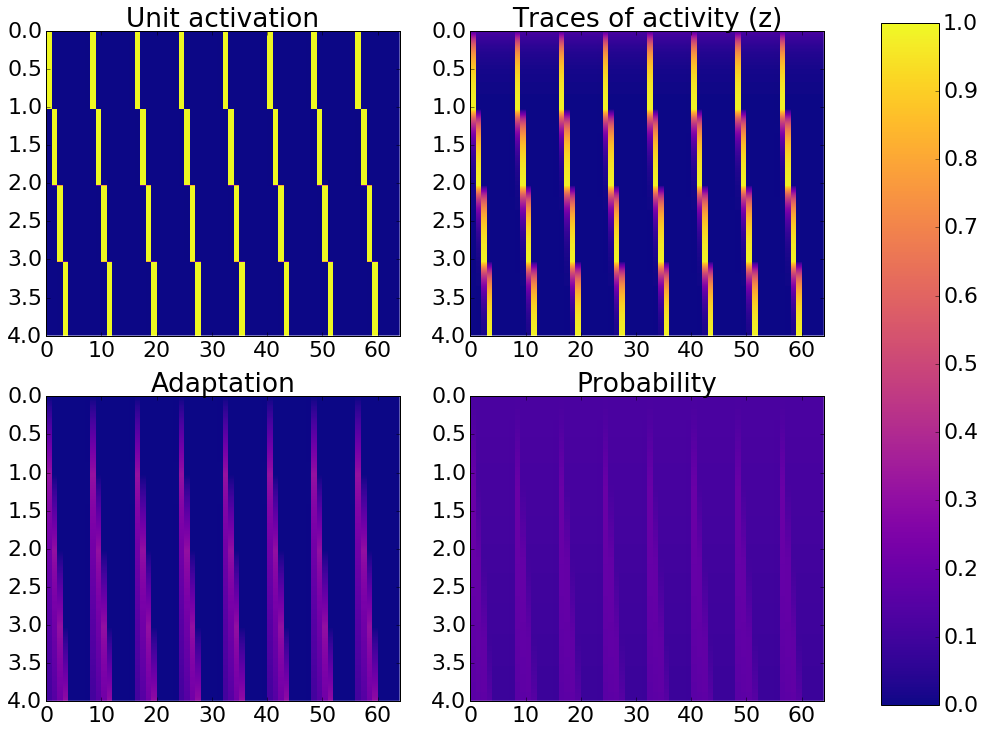

In [5]:
history = nn.history

cmap = 'plasma'
extent = [0, minicolumns * hypercolumns, n_patterns * T_training, 0]

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(221)
im1 = ax1.imshow(history['o'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax1.set_title('Unit activation')

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(history['z_post'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax2.set_title('Traces of activity (z)')

ax3 = fig.add_subplot(223)
im3 = ax3.imshow(history['a'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax3.set_title('Adaptation')

ax4 = fig.add_subplot(224)
im4 = ax4.imshow(history['p_pre'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax4.set_title('Probability')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.79])
fig.colorbar(im1, cax=cbar_ax)

#### Now we check the adaptation

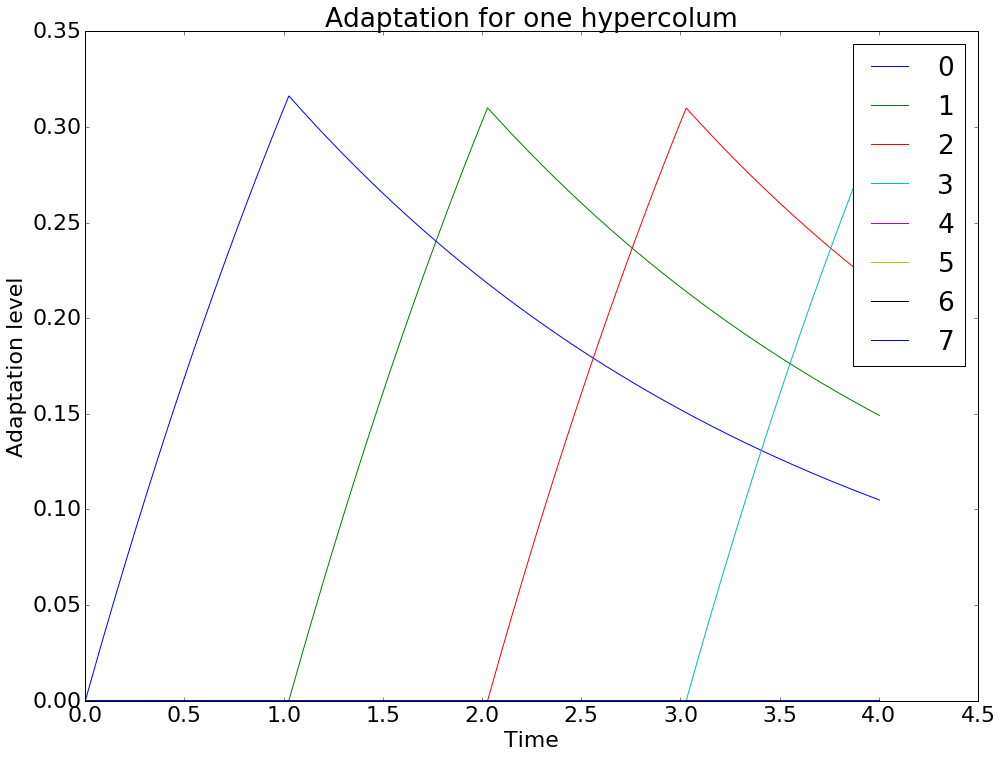

In [6]:
a = history['a']
hypercolum = 0
# a_first = a[:, hypercolum*minicolumns:(hypercolum + 1)*minicolumns + minicolumns]
a_first = a[:, 0:minicolumns]
time_aux = np.arange(0, n_patterns * (T_training + dt), dt)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for unit, a_unit in enumerate(a_first.T):
    ax.plot(time_aux, a_unit, label=str(unit))

ax.set_title('Adaptation for one hypercolum')
ax.set_xlabel('Time')
ax.set_ylabel('Adaptation level')
ax.legend()

#### Unit support

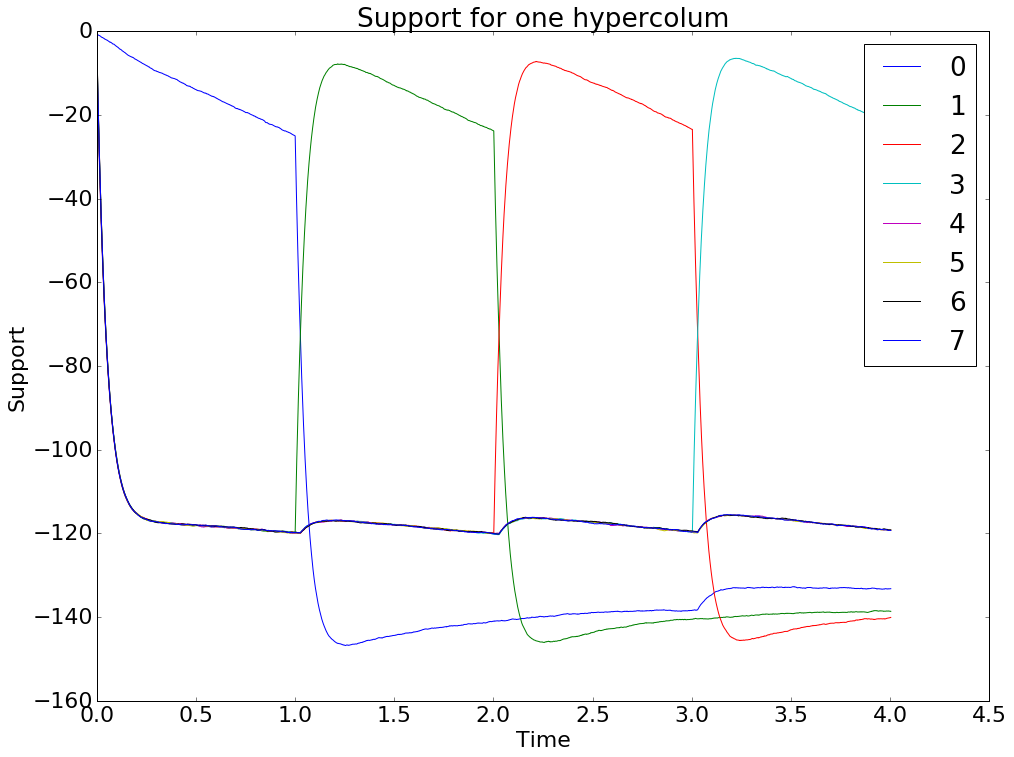

In [7]:
s = history['s']
hypercolum = 0
time_aux = np.arange(0, n_patterns * (T_training + dt), dt)
s_first = s[:, 0:minicolumns]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for unit, s_unit in enumerate(s_first.T):
    ax.plot(time_aux, s_unit, label=str(unit))

ax.set_title('Support for one hypercolum')
ax.set_xlabel('Time')
ax.set_ylabel('Support')
ax.legend()

#### Unit activity

(-0.1, 1.1)

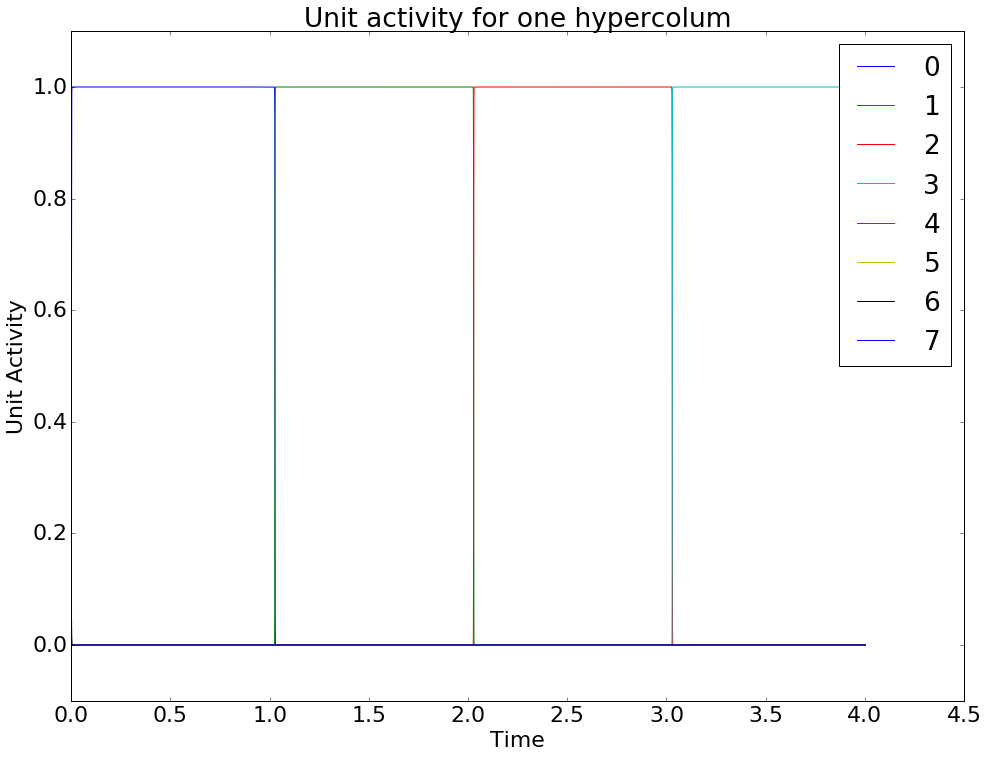

In [8]:
o = history['o']
hypercolum = 0
o_first = o[:, 0:minicolumns]
time_aux = np.arange(0, n_patterns * (T_training + dt), dt)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for unit, o_unit in enumerate(o_first.T):
    ax.plot(time_aux, o_unit, label=str(unit))

ax.set_title('Unit activity for one hypercolum')
ax.set_xlabel('Time')
ax.set_ylabel('Unit Activity')
ax.legend()

ax.set_ylim([-0.1, 1.1])

## Recall

In [9]:
# Time 
T_recalling = 10.0
recalling_time = np.arange(0, T_recalling + dt, dt)

# Reinitialize parameters
nn.k = 0
nn.empty_history()
# nn.reset_values(keep_connectivity=True)
# nn.randomize_pattern()
history = nn.run_network_simulation(time=recalling_time, save=True)

# Print parameters
nn.get_parameters()

{'g_I': 10.0,
 'g_a': 97.0,
 'g_beta': 1,
 'g_w': 1,
 'k': 0,
 'sigma': 1.0,
 'tau_a': 2.7,
 'tau_m': 0.05,
 'tau_p': 10.0,
 'tau_z_post': 0.24,
 'tau_z_pre': 0.24}

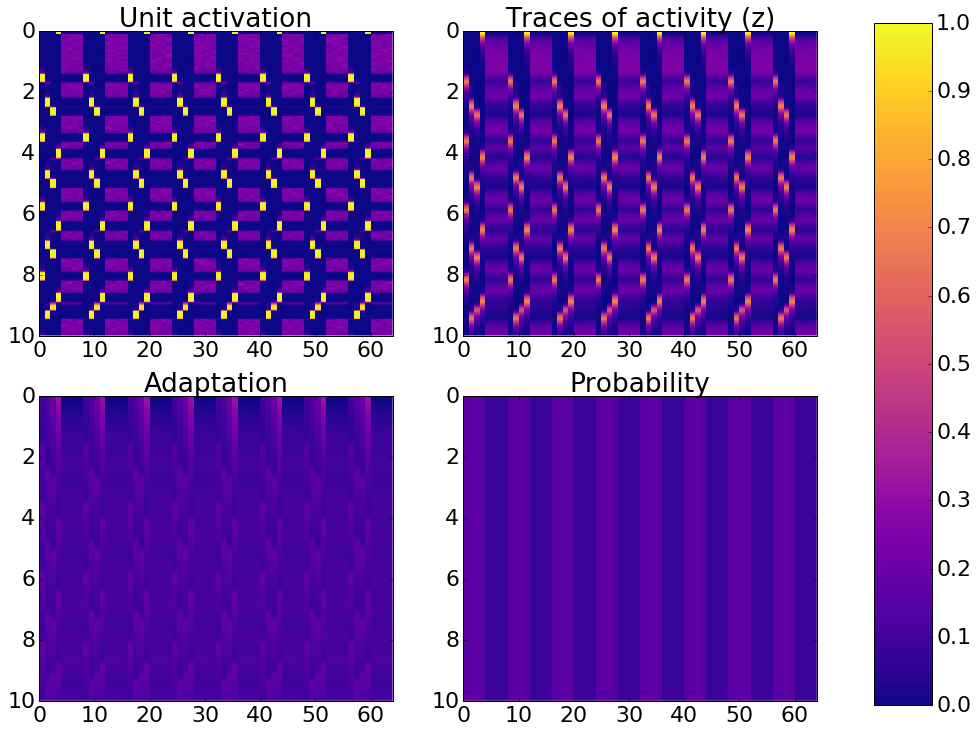

In [10]:
cmap = 'plasma'
extent = [0, minicolumns * hypercolumns, T_recalling, 0]

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(221)
im1 = ax1.imshow(history['o'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax1.set_title('Unit activation')

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(history['z_post'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax2.set_title('Traces of activity (z)')

ax3 = fig.add_subplot(223)
im3 = ax3.imshow(history['a'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax3.set_title('Adaptation')

ax4 = fig.add_subplot(224)
im4 = ax4.imshow(history['p_pre'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax4.set_title('Probability')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.79])
fig.colorbar(im1, cax=cbar_ax)

#### Adaptation 

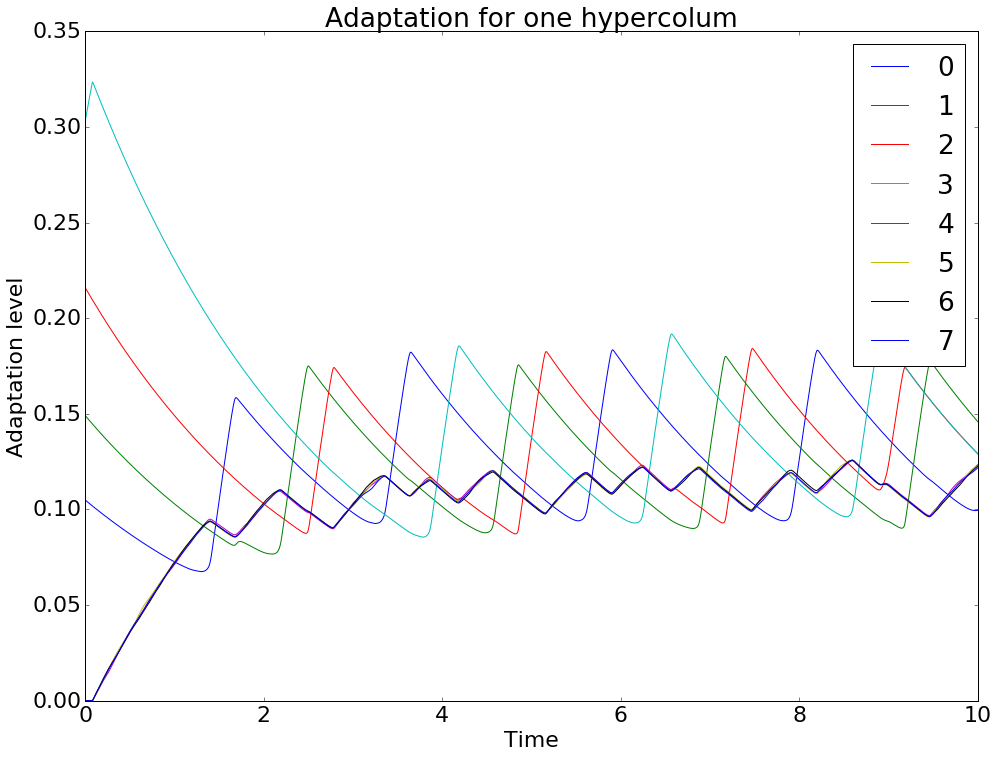

In [11]:
a = history['a']
hypercolum = 0
# a_first = a[:, hypercolum*minicolumns:(hypercolum + 1)*minicolumns + minicolumns]
a_first = a[:, 0:minicolumns]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for unit, a_unit in enumerate(a_first.T):
    ax.plot(recalling_time, a_unit, label=str(unit))

ax.set_title('Adaptation for one hypercolum')
ax.set_xlabel('Time')
ax.set_ylabel('Adaptation level')
ax.legend()

#### Support

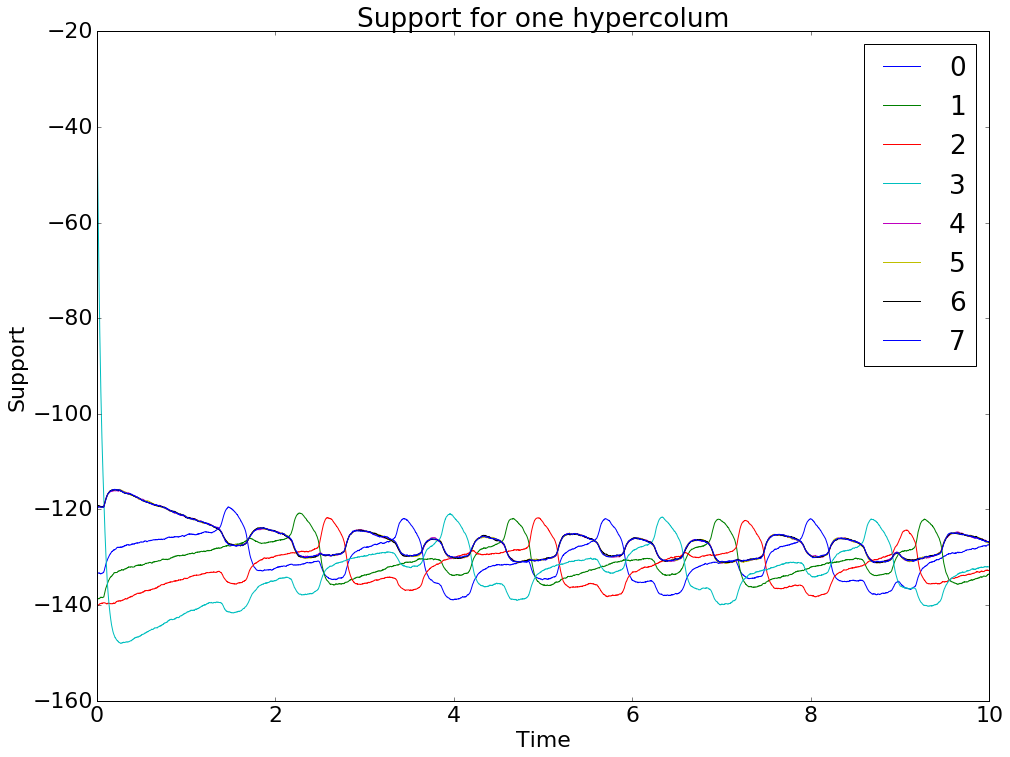

In [12]:
s = history['s']
hypercolum = 0
# a_first = a[:, hypercolum*minicolumns:(hypercolum + 1)*minicolumns + minicolumns]
s_first = s[:, 0:minicolumns]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for unit, s_unit in enumerate(s_first.T):
    ax.plot(recalling_time, s_unit, label=str(unit))

ax.set_title('Support for one hypercolum')
ax.set_xlabel('Time')
ax.set_ylabel('Support')
ax.legend()

#### Unit Activity

(-0.1, 1.1)

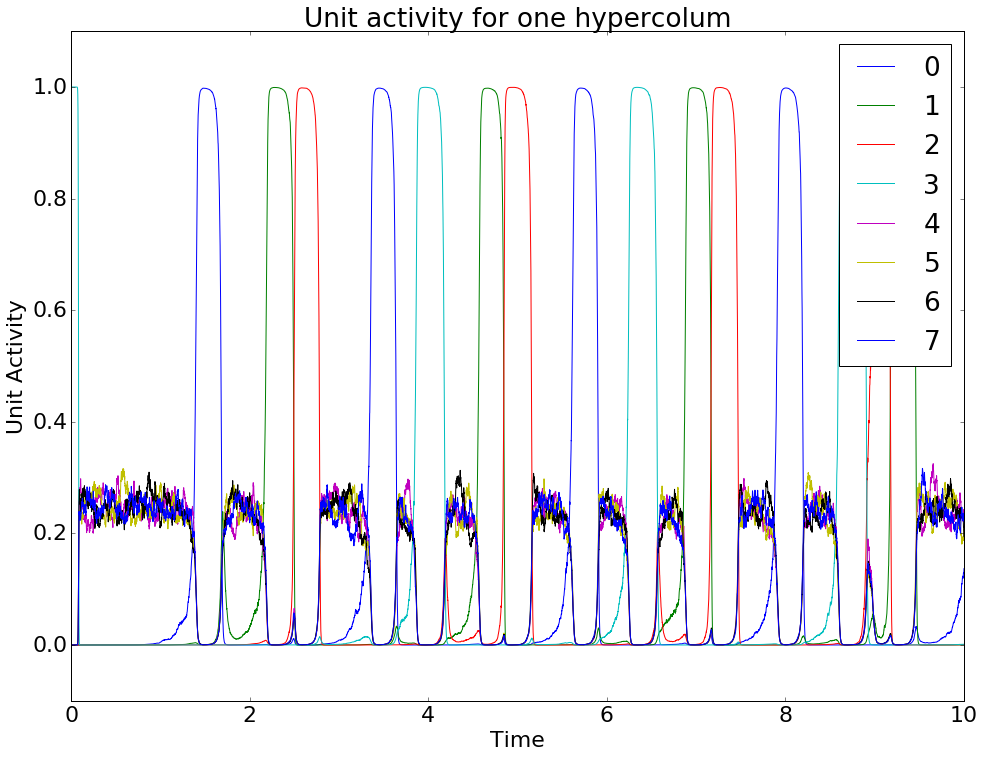

In [13]:
o = history['o']
hypercolum = 0
o_first = o[:, 0:minicolumns]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for unit, o_unit in enumerate(o_first.T):
    ax.plot(recalling_time, o_unit, label=str(unit))

ax.set_title('Unit activity for one hypercolum')
ax.set_xlabel('Time')
ax.set_ylabel('Unit Activity')
ax.legend()


ax.set_ylim([-0.1, 1.1])

## Empty history

In [14]:
# Reinitialize parameters
nn.k = 0
nn.empty_history()
nn.reset_values(keep_connectivity=True)
# nn.randomize_pattern()
history = nn.run_network_simulation(time=recalling_time, save=True)

# Print parameters
nn.get_parameters()

{'g_I': 10.0,
 'g_a': 97.0,
 'g_beta': 1,
 'g_w': 1,
 'k': 0,
 'sigma': 1.0,
 'tau_a': 2.7,
 'tau_m': 0.05,
 'tau_p': 10.0,
 'tau_z_post': 0.24,
 'tau_z_pre': 0.24}

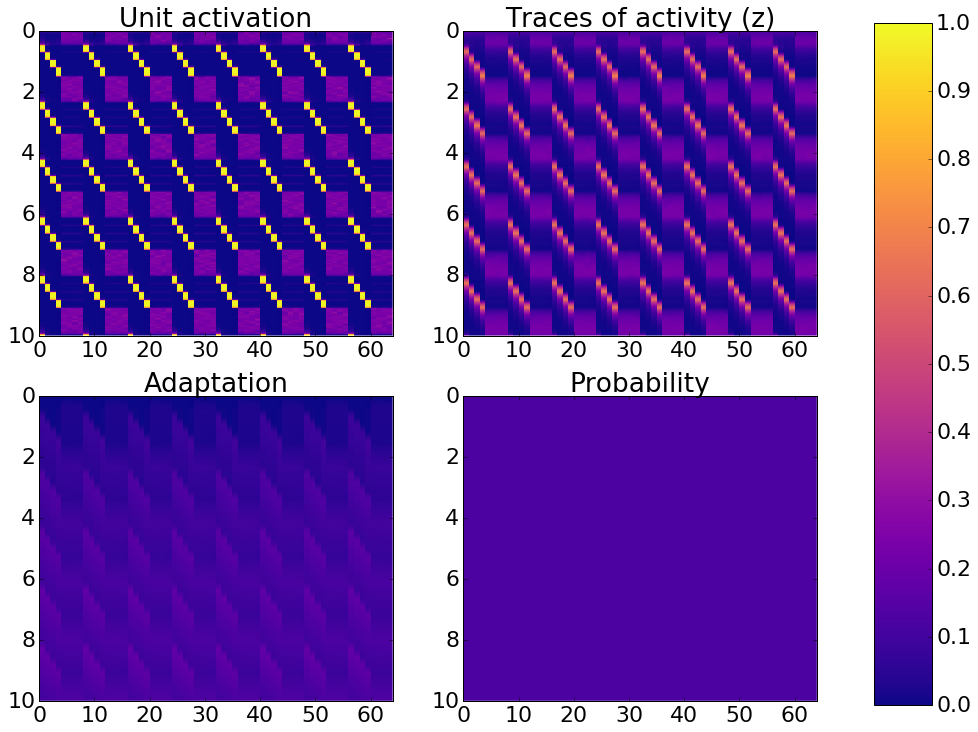

In [15]:
cmap = 'plasma'
extent = [0, minicolumns * hypercolumns, T_recalling, 0]

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(221)
im1 = ax1.imshow(history['o'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax1.set_title('Unit activation')

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(history['z_post'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax2.set_title('Traces of activity (z)')

ax3 = fig.add_subplot(223)
im3 = ax3.imshow(history['a'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax3.set_title('Adaptation')

ax4 = fig.add_subplot(224)
im4 = ax4.imshow(history['p_pre'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax4.set_title('Probability')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.79])
fig.colorbar(im1, cax=cbar_ax)

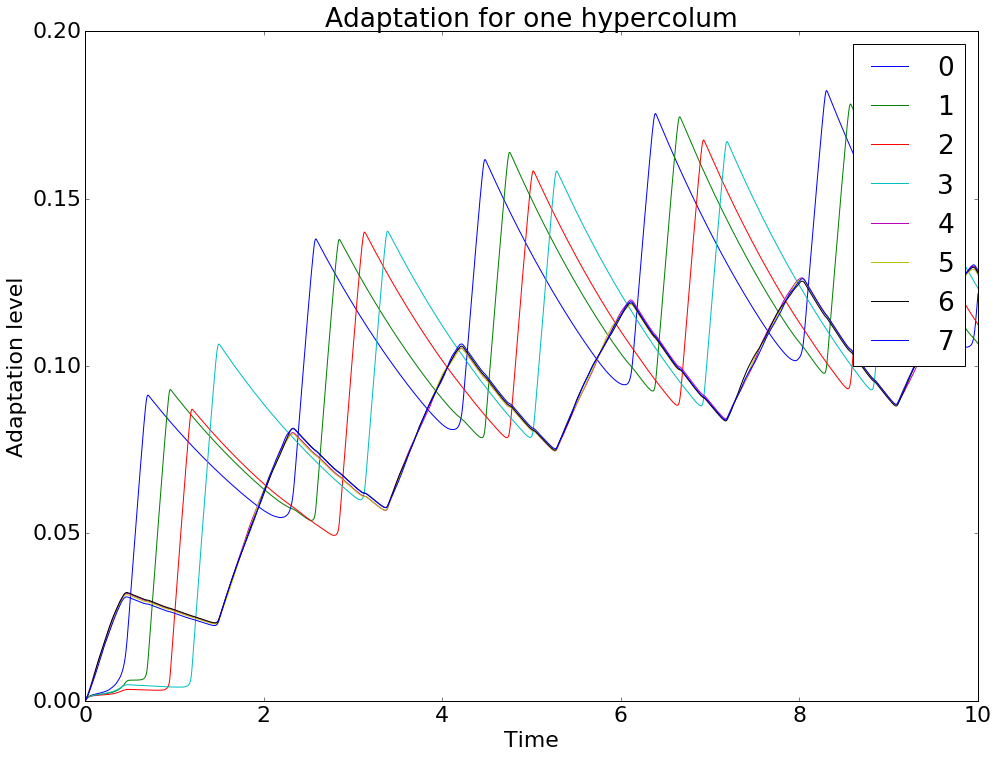

In [16]:
a = history['a']
hypercolum = 0
# a_first = a[:, hypercolum*minicolumns:(hypercolum + 1)*minicolumns + minicolumns]
a_first = a[:, 0:minicolumns]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for unit, a_unit in enumerate(a_first.T):
    ax.plot(recalling_time, a_unit, label=str(unit))

ax.set_title('Adaptation for one hypercolum')
ax.set_xlabel('Time')
ax.set_ylabel('Adaptation level')
ax.legend()
# ax.set_ylim([0.15,0.25])
# ax.set_ylim([-140, -100])
# ax.set_xlim([2.5, 4])

#### Support

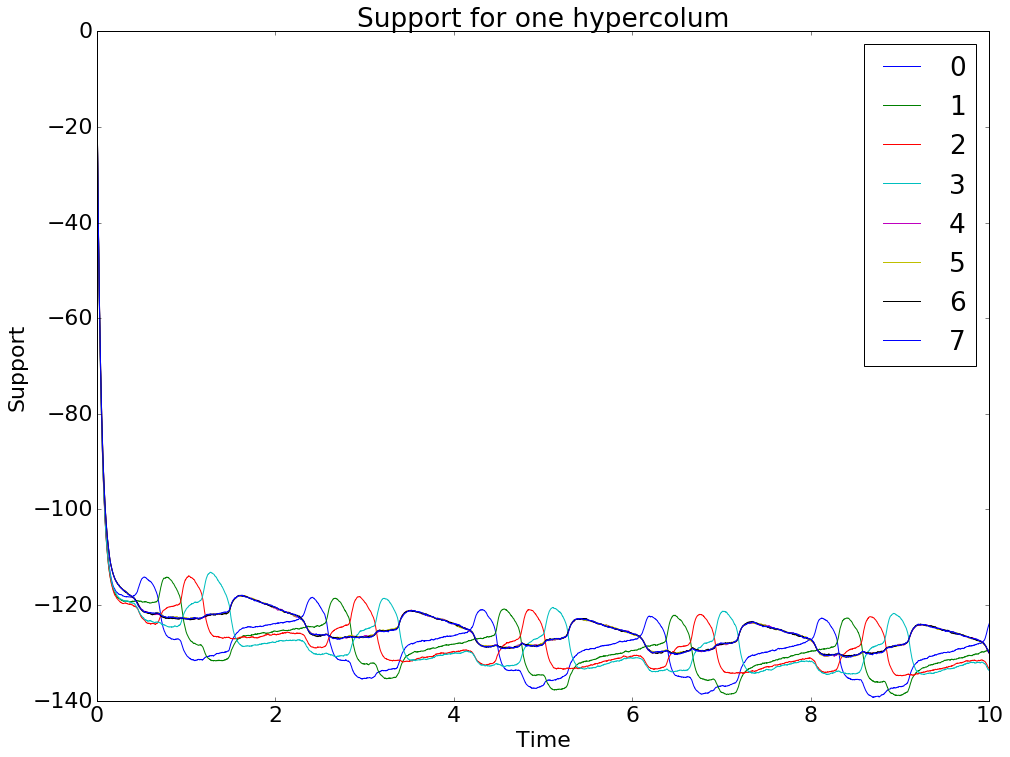

In [17]:
s = history['s']
hypercolum = 0
# a_first = a[:, hypercolum*minicolumns:(hypercolum + 1)*minicolumns + minicolumns]
s_first = s[:, 0:minicolumns]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for unit, s_unit in enumerate(s_first.T):
    ax.plot(recalling_time, s_unit, label=str(unit))

ax.set_title('Support for one hypercolum')
ax.set_xlabel('Time')
ax.set_ylabel('Support')
ax.legend()

#### Unit activity

(-0.1, 1.1)

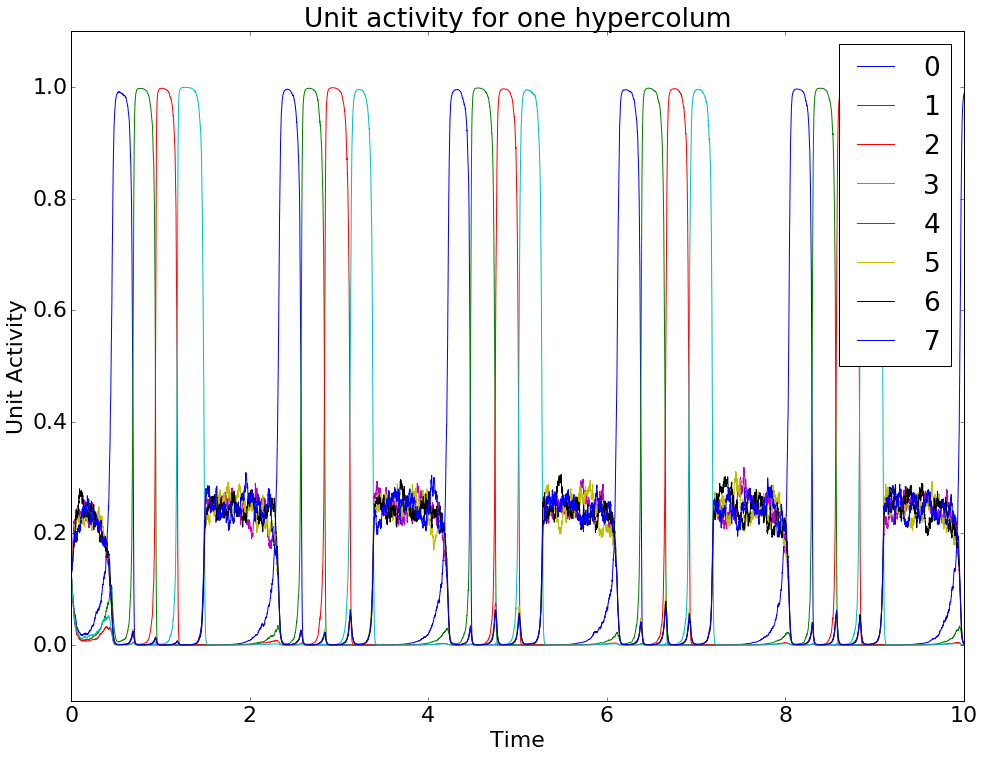

In [18]:
o = history['o']
hypercolum = 0
o_first = o[:, 0:minicolumns]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for unit, o_unit in enumerate(o_first.T):
    ax.plot(recalling_time, o_unit, label=str(unit))

ax.set_title('Unit activity for one hypercolum')
ax.set_xlabel('Time')
ax.set_ylabel('Unit Activity')
ax.legend()

ax.set_ylim([-0.1, 1.1])

#### Git reset

In [19]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])